In [7]:
import numpy as np
import scipy.stats
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import MDAnalysis as md

In [13]:
f = np.load('../data.npz')
x = f['feature']
y = f['propensity']
t = f['frame_list']

In [14]:
u = md.Universe('../data/md800.tpr', '../data/md800_500ps.xtc')
ow = u.select_atoms("name OW")

In [16]:
frame = t[0]
ts = u.trajectory[frame]
pos = ow.positions
prop = y[0]
fea = x[0]

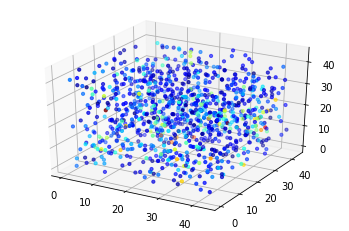

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:,0], pos[:,1], pos[:,2], c=prop, cmap=plt.cm.jet, s=10)

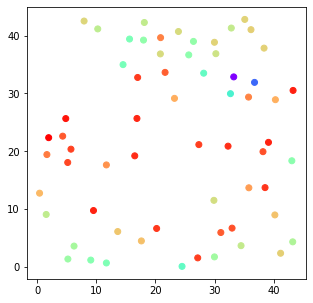

In [24]:
xx = np.linspace(0,30,100)
yy =  np.linspace(0,30,100)
X, Y = np.meshgrid(xx,yy)
mask = (pos[:,2]>10) & (pos[:,2]<13)

Ti = griddata((pos[mask,0], pos[mask,1]),
                          prop[mask], (X, Y), method='linear')


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.scatter(pos[mask,0], pos[mask,1], c=prop[mask], cmap=plt.cm.rainbow_r)

In [81]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
print(grid_x)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.01010101 0.01010101 0.01010101 ... 0.01010101 0.01010101 0.01010101]
 [0.02020202 0.02020202 0.02020202 ... 0.02020202 0.02020202 0.02020202]
 ...
 [0.97979798 0.97979798 0.97979798 ... 0.97979798 0.97979798 0.97979798]
 [0.98989899 0.98989899 0.98989899 ... 0.98989899 0.98989899 0.98989899]
 [1.         1.         1.         ... 1.         1.         1.        ]]
